In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
dataset=pd.read_csv('Water.csv')
dataset.head()

,Water Volume,Temperature,Rainfall
0,0.0,10.9,294
1,22.7,10.3,212
2,0.1,9.0,302
3,0.1,9.5,287
4,0.0,10.3,227


In [7]:
#preprocessing

x_full_1=dataset.iloc[:,0:1].values

#feature scaling 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

x_full=sc.fit_transform(x_full_1)

look_back=3
x_full1=[]
y_full1=[]
for i in range(look_back,len(x_full)):
  x_full1.append(x_full[i-look_back:i-1])
  y_full1.append(x_full[i])

test_size=100
x_train=x_full1[0:len(x_full1)-100]
y_train=y_full1[0:len(y_full1)-100]
x_test=x_full1[len(x_full1)-100:]
y_test=y_full1[len(y_full1)-100:]

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test= np.array(x_test),np.array(y_test)
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [8]:
#RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(x_train,y_train, epochs=100, batch_size=32)


Using TensorFlow backend.


Epoch 1/100
1124/1124 [==============================] - 2s 2ms/step - loss: 0.0069
Epoch 2/100
1124/1124 [==============================] - 0s 308us/step - loss: 0.0068
Epoch 3/100
1124/1124 [==============================] - 0s 300us/step - loss: 0.0068
Epoch 4/100
1124/1124 [==============================] - 0s 254us/step - loss: 0.0067
Epoch 5/100
1124/1124 [==============================] - 0s 259us/step - loss: 0.0066
Epoch 6/100
1124/1124 [==============================] - 0s 268us/step - loss: 0.0067
Epoch 7/100
1124/1124 [==============================] - 0s 271us/step - loss: 0.0066
Epoch 8/100
1124/1124 [==============================] - 0s 290us/step - loss: 0.0066
Epoch 9/100
1124/1124 [==============================] - 0s 280us/step - loss: 0.0066
Epoch 10/100
1124/1124 [==============================] - 0s 286us/step - loss: 0.0066
Epoch 11/100
1124/1124 [==============================] - 0s 244us/step - loss: 0.0066
Epoch 12/100
1124/1124 [==============================

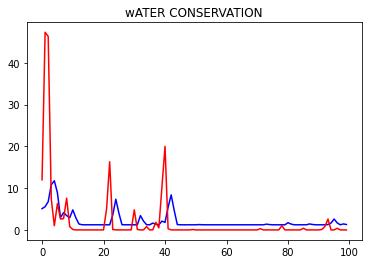

In [10]:

y_pred=regressor.predict(x_test)
y_pred=sc.inverse_transform(y_pred)
#plot
plt.plot(y_pred, color='blue',label='prediction')
plt.plot(sc.inverse_transform(y_test),color='red',label='real')
plt.title('wATER CONSERVATION')

plt.show()